In [1]:
# importing all necessary and required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.summarization.bm25 import get_bm25_weights
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords 
import sklearn
import math
from sklearn.cluster import KMeans

C:\Users\preksha\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## Fetching Data

In [2]:
data = pd.read_csv("tennis_articles_v4.csv")

In [3]:
# viewing data example to know how our data actually lools like
data.head()

,article_id,article_text
0,1,"A toy is an item that is used in play, especia..."
1,2,The origin of toys is prehistoric; dolls repre...
2,3,Playing with toys is considered to be importan...
3,4,Most children have been said to play with what...
4,5,They have been written about in some of the ol...


In [4]:
#splitting the documents into list of sentences.
sentences = [] 
for s in data['article_text']:
    sentences.append(sent_tokenize(s))
sentences = [[y] for x in sentences for y in x] # flatten list

In [5]:
sentences[:5]

[['A toy is an item that is used in play, especially one designed for such use.'],
 ['Playing with toys can be an enjoyable means of training young children for life in society.'],
 ['Different materials like wood, clay, paper, and plastic are used to make toys.'],
 ['Many items are designed to serve as toys, but goods produced for other purposes can also be used.'],
 ['For instance, a small child may fold an ordinary piece of paper into an airplane shape and "fly it".']]

In [6]:
word_sentence=[]
for i in sentences:
    for j in i:
        word_sentence.append(word_tokenize(j))
word_sentence

[['A',
  'toy',
  'is',
  'an',
  'item',
  'that',
  'is',
  'used',
  'in',
  'play',
  ',',
  'especially',
  'one',
  'designed',
  'for',
  'such',
  'use',
  '.'],
 ['Playing',
  'with',
  'toys',
  'can',
  'be',
  'an',
  'enjoyable',
  'means',
  'of',
  'training',
  'young',
  'children',
  'for',
  'life',
  'in',
  'society',
  '.'],
 ['Different',
  'materials',
  'like',
  'wood',
  ',',
  'clay',
  ',',
  'paper',
  ',',
  'and',
  'plastic',
  'are',
  'used',
  'to',
  'make',
  'toys',
  '.'],
 ['Many',
  'items',
  'are',
  'designed',
  'to',
  'serve',
  'as',
  'toys',
  ',',
  'but',
  'goods',
  'produced',
  'for',
  'other',
  'purposes',
  'can',
  'also',
  'be',
  'used',
  '.'],
 ['For',
  'instance',
  ',',
  'a',
  'small',
  'child',
  'may',
  'fold',
  'an',
  'ordinary',
  'piece',
  'of',
  'paper',
  'into',
  'an',
  'airplane',
  'shape',
  'and',
  '``',
  'fly',
  'it',
  "''",
  '.'],
 ['Newer',
  'forms',
  'of',
  'toys',
  'include',
  'in

In [7]:
#removal of stop words
stop_words = set(stopwords.words('english')) 
line=[]
filtered_sentence=[]

for i in word_sentence:
    for j in i:
        if not j in stop_words:
            line.append(j)
    filtered_sentence.append(line)
    line=[]

In [8]:
filtered_sentence

[['A',
  'toy',
  'item',
  'used',
  'play',
  ',',
  'especially',
  'one',
  'designed',
  'use',
  '.'],
 ['Playing',
  'toys',
  'enjoyable',
  'means',
  'training',
  'young',
  'children',
  'life',
  'society',
  '.'],
 ['Different',
  'materials',
  'like',
  'wood',
  ',',
  'clay',
  ',',
  'paper',
  ',',
  'plastic',
  'used',
  'make',
  'toys',
  '.'],
 ['Many',
  'items',
  'designed',
  'serve',
  'toys',
  ',',
  'goods',
  'produced',
  'purposes',
  'also',
  'used',
  '.'],
 ['For',
  'instance',
  ',',
  'small',
  'child',
  'may',
  'fold',
  'ordinary',
  'piece',
  'paper',
  'airplane',
  'shape',
  '``',
  'fly',
  "''",
  '.'],
 ['Newer',
  'forms',
  'toys',
  'include',
  'interactive',
  'digital',
  'entertainment',
  '.'],
 ['Some',
  'toys',
  'produced',
  'primarily',
  'collectors',
  "'",
  'items',
  'intended',
  'display',
  '.'],
 ['The',
  'origin',
  'toys',
  'prehistoric',
  ';',
  'dolls',
  'representing',
  'infants',
  ',',
  'animals

In [9]:
#stemming the words
from nltk.stem import PorterStemmer 
ps = PorterStemmer()
stemmed_sentences=[]
line=[]
for i in filtered_sentence:
    for j in i:
       line.append(ps.stem(j))
    stemmed_sentences.append(line)
    line=[]

In [10]:
stemmed_sentences

[['A',
  'toy',
  'item',
  'use',
  'play',
  ',',
  'especi',
  'one',
  'design',
  'use',
  '.'],
 ['play',
  'toy',
  'enjoy',
  'mean',
  'train',
  'young',
  'children',
  'life',
  'societi',
  '.'],
 ['differ',
  'materi',
  'like',
  'wood',
  ',',
  'clay',
  ',',
  'paper',
  ',',
  'plastic',
  'use',
  'make',
  'toy',
  '.'],
 ['mani',
  'item',
  'design',
  'serv',
  'toy',
  ',',
  'good',
  'produc',
  'purpos',
  'also',
  'use',
  '.'],
 ['for',
  'instanc',
  ',',
  'small',
  'child',
  'may',
  'fold',
  'ordinari',
  'piec',
  'paper',
  'airplan',
  'shape',
  '``',
  'fli',
  "''",
  '.'],
 ['newer', 'form', 'toy', 'includ', 'interact', 'digit', 'entertain', '.'],
 ['some',
  'toy',
  'produc',
  'primarili',
  'collector',
  "'",
  'item',
  'intend',
  'display',
  '.'],
 ['the',
  'origin',
  'toy',
  'prehistor',
  ';',
  'doll',
  'repres',
  'infant',
  ',',
  'anim',
  ',',
  'soldier',
  ',',
  'well',
  'represent',
  'tool',
  'use',
  'adult',
  '

In [11]:
# remove punctuations, numbers and special characters
alphabetic_sentences=[]
line=[]
for i in stemmed_sentences:
    line.append(pd.Series(i).str.replace("[^a-zA-Z]", " "))
    
    
    alphabetic_sentences.append(line)
    line=[]

In [12]:
line = []

for i in alphabetic_sentences:
   
    for j in i:
        l=[]
        for x in j.values:
            if not x ==' ':
                l.append(x.lower())
        line.append(l)
line

[['a', 'toy', 'item', 'use', 'play', 'especi', 'one', 'design', 'use'],
 ['play',
  'toy',
  'enjoy',
  'mean',
  'train',
  'young',
  'children',
  'life',
  'societi'],
 ['differ',
  'materi',
  'like',
  'wood',
  'clay',
  'paper',
  'plastic',
  'use',
  'make',
  'toy'],
 ['mani',
  'item',
  'design',
  'serv',
  'toy',
  'good',
  'produc',
  'purpos',
  'also',
  'use'],
 ['for',
  'instanc',
  'small',
  'child',
  'may',
  'fold',
  'ordinari',
  'piec',
  'paper',
  'airplan',
  'shape',
  '  ',
  'fli',
  '  '],
 ['newer', 'form', 'toy', 'includ', 'interact', 'digit', 'entertain'],
 ['some',
  'toy',
  'produc',
  'primarili',
  'collector',
  'item',
  'intend',
  'display'],
 ['the',
  'origin',
  'toy',
  'prehistor',
  'doll',
  'repres',
  'infant',
  'anim',
  'soldier',
  'well',
  'represent',
  'tool',
  'use',
  'adult',
  'readili',
  'found',
  'archaeolog',
  'site'],
 ['the',
  'origin',
  'word',
  '  ',
  'toy',
  '  ',
  'unknown',
  'believ',
  'first',


In [13]:
len(line)

62

In [14]:
words=[]
words=[y for x in line for y in x ]

#Taking all distinct words in an array
Distinct_Words=[y for y in set(words)]

In [15]:
Distinct_Words

['certain',
 'futur',
 'intellectu',
 'remain',
 'accept',
 'role',
 'neutral',
 'playth',
 'intrigu',
 'jame',
 'daughter',
 'twentieth',
 'steel',
 'ever',
 'fit',
 'wage',
 'affluent',
 'britain',
 'plasticin',
 'part',
 'purpos',
 'compani',
 'first',
 'synthet',
 'railway',
 'becom',
 'child',
 'putti',
 'some',
 'interlock',
 'teach',
 'childhood',
 'choos',
 'atyp',
 'thi',
 'anim',
 'war',
 'hollow',
 'repercuss',
 'invent',
 'dure',
 'the',
 'barbi',
 'type',
 'among',
 'point',
 'devic',
 'cradl',
 'potato',
 'newton',
 'warrick',
 'product',
 'wood',
 'rememb',
 'develop',
 'indu',
 'stick',
 'involv',
 'identifi',
 'produc',
 'score',
 'mechan',
 'english',
 'word',
 'mainli',
 'fli',
 'through',
 'make',
 'shape',
 'younger',
 'new',
 'sculpt',
 'often',
 're us',
 'tri',
 'perceiv',
 'respons',
 'model',
 'home mad',
 'in',
 'written',
 'imit',
 'androgyn',
 'physic',
 'gender',
 'ancient',
 'miller',
 'suppli',
 'counterpart',
 'lead',
 'problem solv',
 'also',
 'color',

In [16]:
words

['a',
 'toy',
 'item',
 'use',
 'play',
 'especi',
 'one',
 'design',
 'use',
 'play',
 'toy',
 'enjoy',
 'mean',
 'train',
 'young',
 'children',
 'life',
 'societi',
 'differ',
 'materi',
 'like',
 'wood',
 'clay',
 'paper',
 'plastic',
 'use',
 'make',
 'toy',
 'mani',
 'item',
 'design',
 'serv',
 'toy',
 'good',
 'produc',
 'purpos',
 'also',
 'use',
 'for',
 'instanc',
 'small',
 'child',
 'may',
 'fold',
 'ordinari',
 'piec',
 'paper',
 'airplan',
 'shape',
 '  ',
 'fli',
 '  ',
 'newer',
 'form',
 'toy',
 'includ',
 'interact',
 'digit',
 'entertain',
 'some',
 'toy',
 'produc',
 'primarili',
 'collector',
 'item',
 'intend',
 'display',
 'the',
 'origin',
 'toy',
 'prehistor',
 'doll',
 'repres',
 'infant',
 'anim',
 'soldier',
 'well',
 'represent',
 'tool',
 'use',
 'adult',
 'readili',
 'found',
 'archaeolog',
 'site',
 'the',
 'origin',
 'word',
 '  ',
 'toy',
 '  ',
 'unknown',
 'believ',
 'first',
 'use',
 '  th',
 'centuri',
 'toy',
 'mainli',
 'made',
 'children',
 'th

## Visualizing Data

In [17]:
for i in range(len(Distinct_Words)):
    print (i,Distinct_Words[i])

0 certain
1 futur
2 intellectu
3 remain
4 accept
5 role
6 neutral
7 playth
8 intrigu
9 jame
10 daughter
11 twentieth
12 steel
13 ever
14 fit
15 wage
16 affluent
17 britain
18 plasticin
19 part
20 purpos
21 compani
22 first
23 synthet
24 railway
25 becom
26 child
27 putti
28 some
29 interlock
30 teach
31 childhood
32 choos
33 atyp
34 thi
35 anim
36 war
37 hollow
38 repercuss
39 invent
40 dure
41 the
42 barbi
43 type
44 among
45 point
46 devic
47 cradl
48 potato
49 newton
50 warrick
51 product
52 wood
53 rememb
54 develop
55 indu
56 stick
57 involv
58 identifi
59 produc
60 score
61 mechan
62 english
63 word
64 mainli
65 fli
66 through
67 make
68 shape
69 younger
70 new
71 sculpt
72 often
73 re us
74 tri
75 perceiv
76 respons
77 model
78 home mad
79 in
80 written
81 imit
82 androgyn
83 physic
84 gender
85 ancient
86 miller
87 suppli
88 counterpart
89 lead
90 problem solv
91 also
92 color
93 colour
94 may
95 play
96 teenag
97 replac
98 lesson
99 effect
100 mathemat
101 befor
102 prehistor


In [18]:
word_occurance_matrix=np.empty(shape=(len(line),len(Distinct_Words)))
word_occurance_matrix.fill(0)

In [19]:
for i in range(len(line)):
    for j in range(len(line[i])):
        for x in range(len(Distinct_Words)):
            if (Distinct_Words[x]==line[i][j]):
                word_occurance_matrix[i][x] = word_occurance_matrix[i][x] +1
                continue

In [20]:
print(word_occurance_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


## tf-idf

In [21]:
isf=np.array(np.log(len(line)/np.count_nonzero(word_occurance_matrix,axis=0)))
word_weight_matrix=(word_occurance_matrix*isf)
word_weight_matrix

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 3.4339872, 0.       ,
        0.       ]])

## Cosine Similarity

In [22]:
Csimilarity_matrix=np.empty(shape=(len(line),len(line)))

for i in range(len(line)):
    for j in range(len(line)):
        dot_product = np.dot(word_weight_matrix[i], word_weight_matrix[j])
        norm_i = np.linalg.norm(word_weight_matrix[i])
        norm_j = np.linalg.norm(word_weight_matrix[j])
        Csimilarity_matrix[i, j] = dot_product/(norm_i*norm_j)
Csimilarity_matrix

array([[1.        , 0.03287491, 0.10534371, ..., 0.06604958, 0.05695538,
        0.10158115],
       [0.03287491, 1.        , 0.00207273, ..., 0.01889526, 0.05005065,
        0.08926642],
       [0.10534371, 0.00207273, 1.        , ..., 0.00135568, 0.07575281,
        0.        ],
       ...,
       [0.06604958, 0.01889526, 0.00135568, ..., 1.        , 0.08312015,
        0.        ],
       [0.05695538, 0.05005065, 0.07575281, ..., 0.08312015, 1.        ,
        0.        ],
       [0.10158115, 0.08926642, 0.        , ..., 0.        , 0.        ,
        1.        ]])

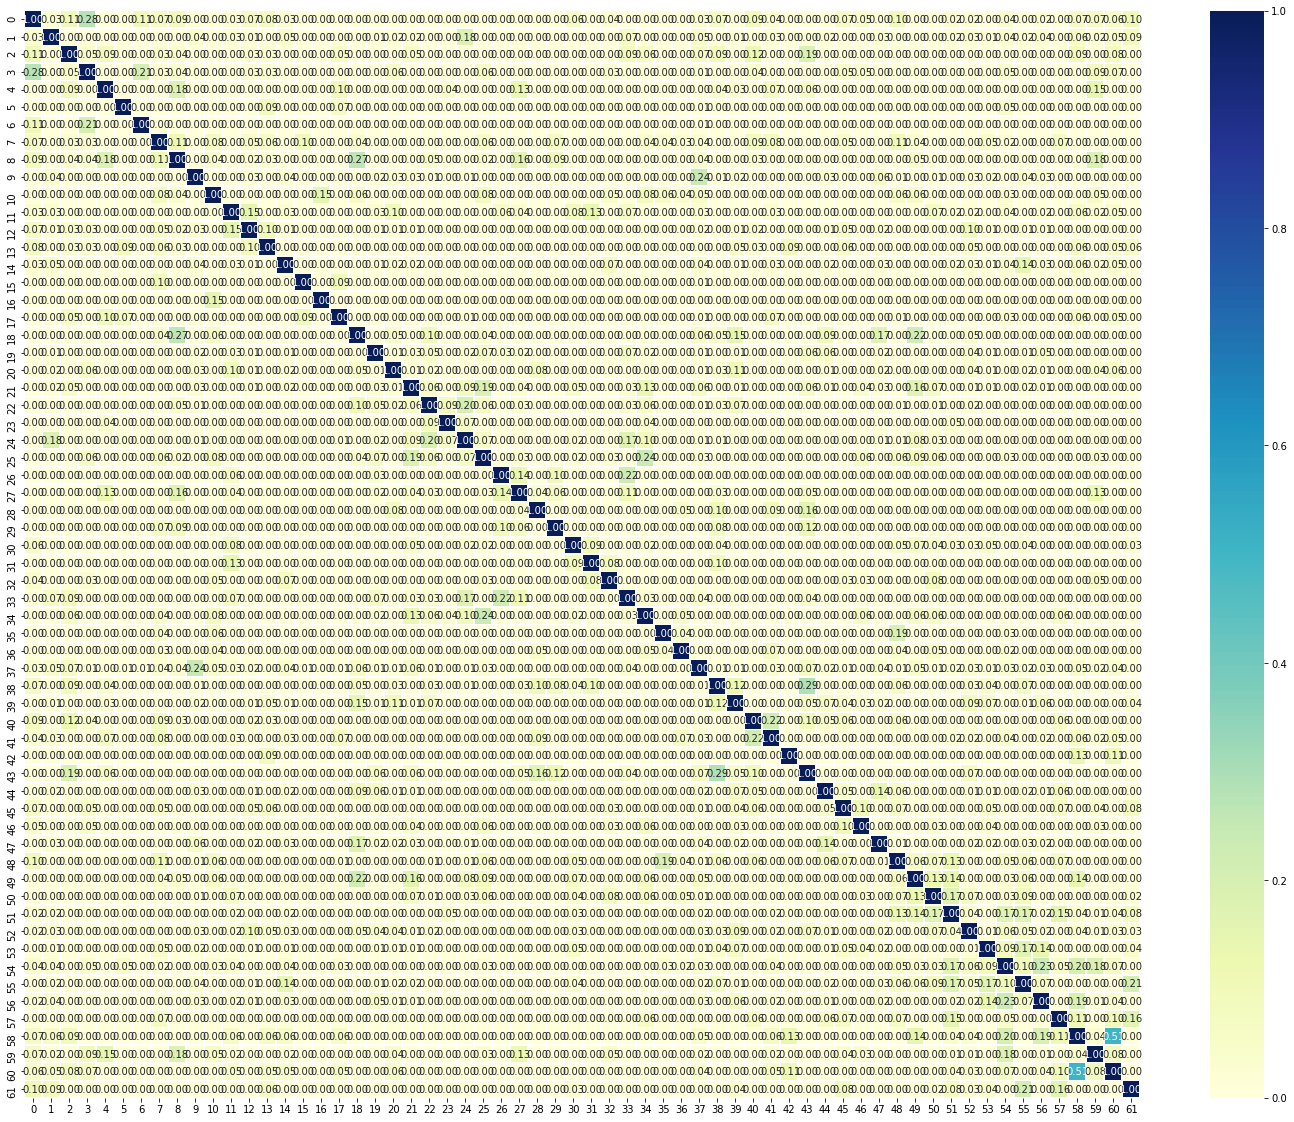

In [23]:
f,ax = plt.subplots(figsize=(25, 20))
sns.heatmap(Csimilarity_matrix, annot=True, linewidths=.5, fmt= '.2f', cmap="YlGnBu")

plt.show()

In [24]:
Cdistance_matrix=1-Csimilarity_matrix

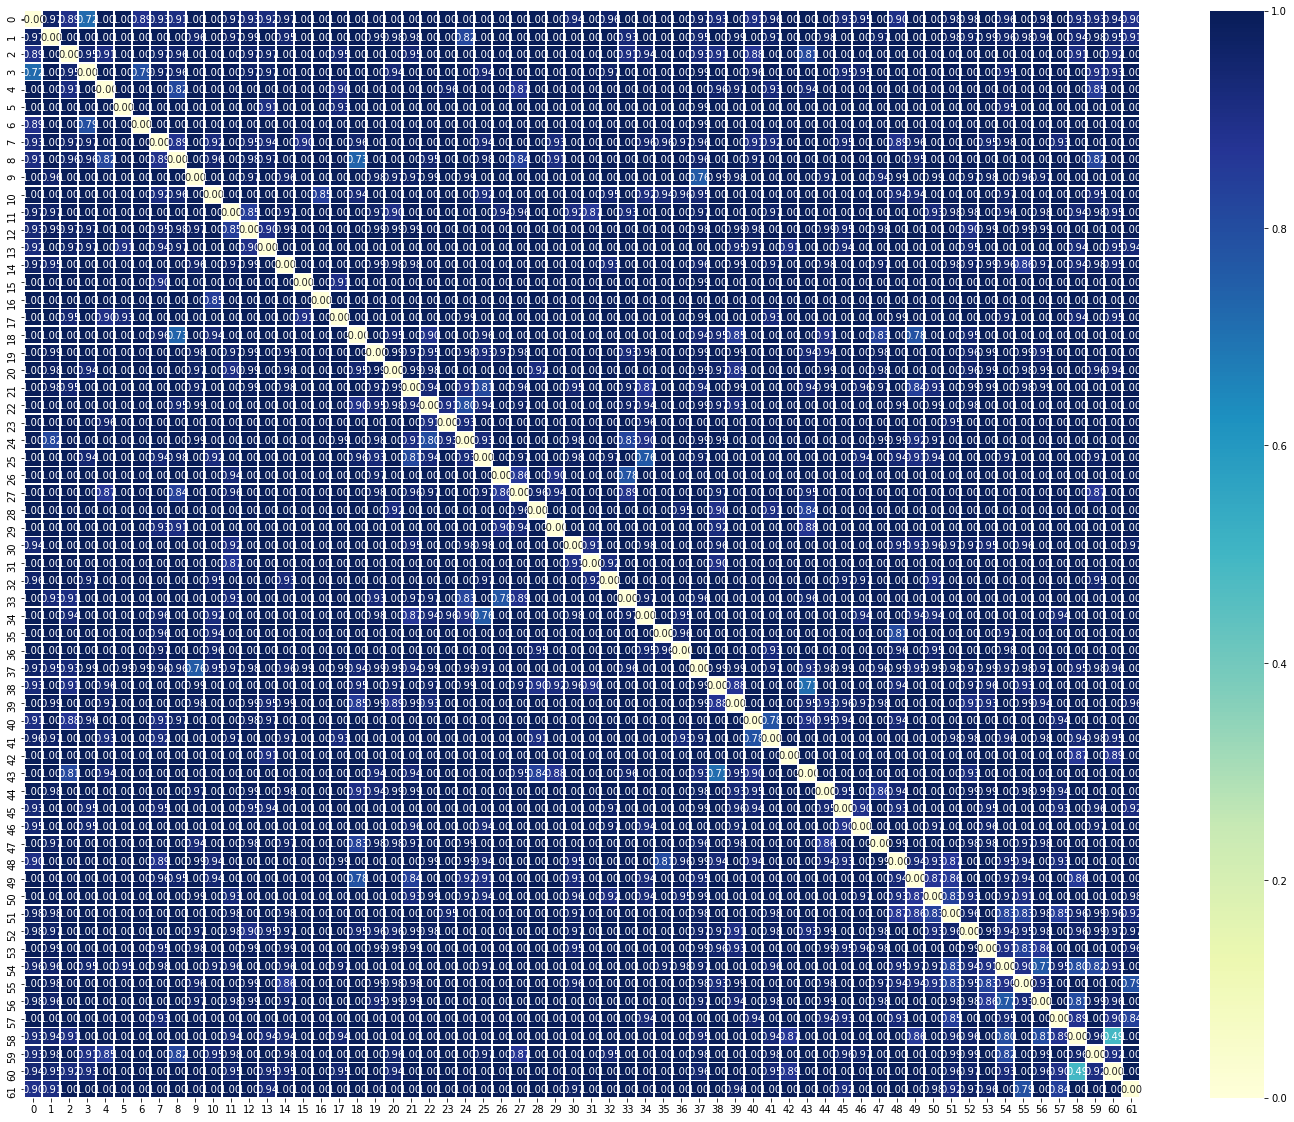

In [25]:
f,ax = plt.subplots(figsize=(25, 20))
sns.heatmap(Cdistance_matrix, annot=True, linewidths=.5, fmt= '.2f', cmap="YlGnBu")

plt.show()

## Clustering

### K-Medoids

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 3. 3. 3. 3. 3. 0. 3. 0. 3. 3. 0.]


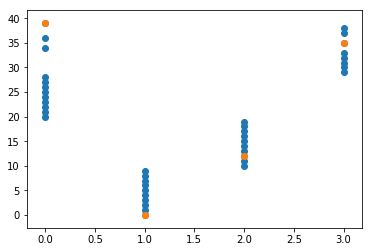

In [26]:
from pyclustering.cluster import kmedoids
import random

def kMedoids(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape

    if k > n:
        raise Exception('too many medoids')

    # find a set of valid initial cluster medoid indices since we
    # can't seed different clusters with two points at the same location
    valid_medoid_inds = set(range(n))
    invalid_medoid_inds = set([])
    rs,cs = np.where(D==0)
    # the rows, cols must be shuffled because we will keep the first duplicate below
    index_shuf = list(range(len(rs)))
    np.random.shuffle(index_shuf)
    rs = rs[index_shuf]
    cs = cs[index_shuf]
    for r,c in zip(rs,cs):
        # if there are two points with a distance of 0...
        # keep the first one for cluster init
        if r < c and r not in invalid_medoid_inds:
            invalid_medoid_inds.add(c)
    valid_medoid_inds = list(valid_medoid_inds - invalid_medoid_inds)

    if k > len(valid_medoid_inds):
        raise Exception('too many medoids (after removing {} duplicate points)'.format(
            len(invalid_medoid_inds)))

    # randomly initialize an array of k medoid indices
    M = np.array(valid_medoid_inds)
    np.random.shuffle(M)
    M = np.sort(M[:k])

    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in range(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

    # return results
    return M, C

##############################################################################################################################

matrix = Cdistance_matrix
M, C = kMedoids(matrix, 4)


##############################################################################################################################

a=np.empty(shape=len(line))
for i in range(len(C)):
    for j in (C[i]):
        a[j]=i
print(a)
    
arr=np.empty(shape=len(line))   
for i in range(len(line)):
    arr[i]=(i)

m=[0,1,2,3]

#plt.figure(figsize=(15,10))
plt.scatter(a, arr)
plt.scatter(m,M)

### K-Means

In [48]:
mat = Cdistance_matrix

kmeans = KMeans(n_clusters=4, init='k-means++').fit_predict(mat)
print(kmeans)

#plt.figure(figsize=(15,10))
plt.scatter(kmeans, arr)

AttributeError: 'numpy.ndarray' object has no attribute 'inertia_'

## Jaccard Similarity

In [28]:
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)

Jsimilarity_matrix=np.empty(shape=(len(line),len(line)))

for i in range(len(line)):
    for j in range(len(line)):
        Jsimilarity_matrix[i, j] = jaccard_similarity(word_weight_matrix[i], word_weight_matrix[j])
        
Jsimilarity_matrix

array([[1.        , 0.5       , 0.83333333, ..., 0.3       , 0.22222222,
        0.22222222],
       [0.5       , 1.        , 0.66666667, ..., 0.2       , 0.11111111,
        0.11111111],
       [0.83333333, 0.66666667, 1.        , ..., 0.4       , 0.2       ,
        0.2       ],
       ...,
       [0.3       , 0.2       , 0.4       , ..., 1.        , 0.55555556,
        0.55555556],
       [0.22222222, 0.11111111, 0.2       , ..., 0.55555556, 1.        ,
        0.5       ],
       [0.22222222, 0.11111111, 0.2       , ..., 0.55555556, 0.5       ,
        1.        ]])

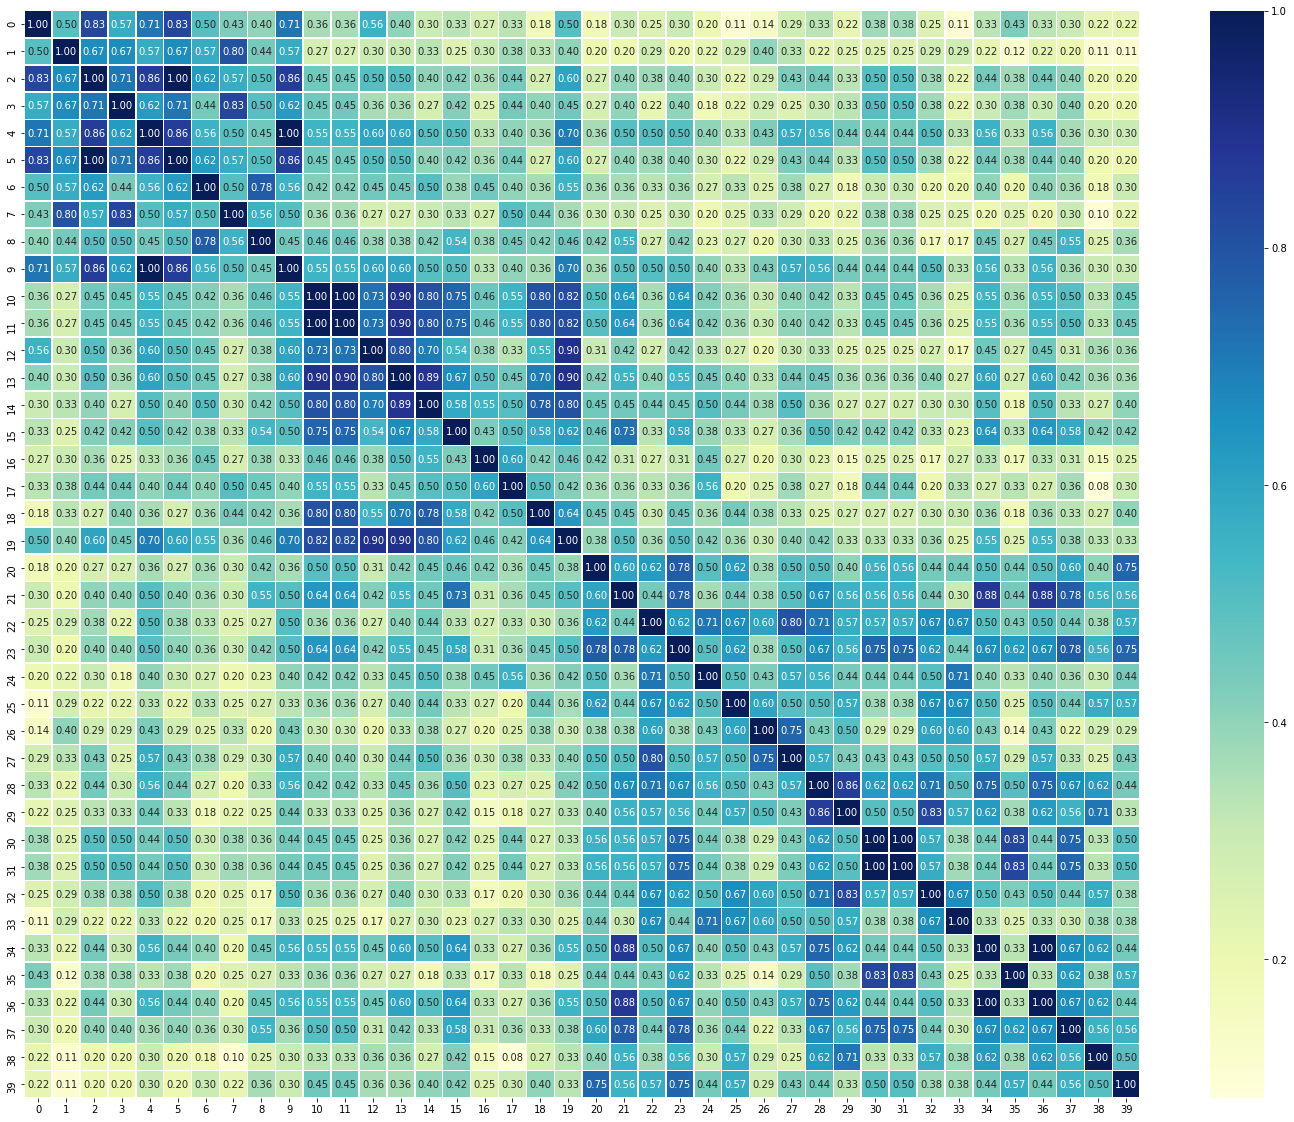

In [29]:
f,ax = plt.subplots(figsize=(25, 20))
sns.heatmap(Jsimilarity_matrix, annot=True, linewidths=.5, fmt= '.2f', cmap="YlGnBu")

plt.show()

In [30]:
Jdistance_matrix = 1 - Jsimilarity_matrix

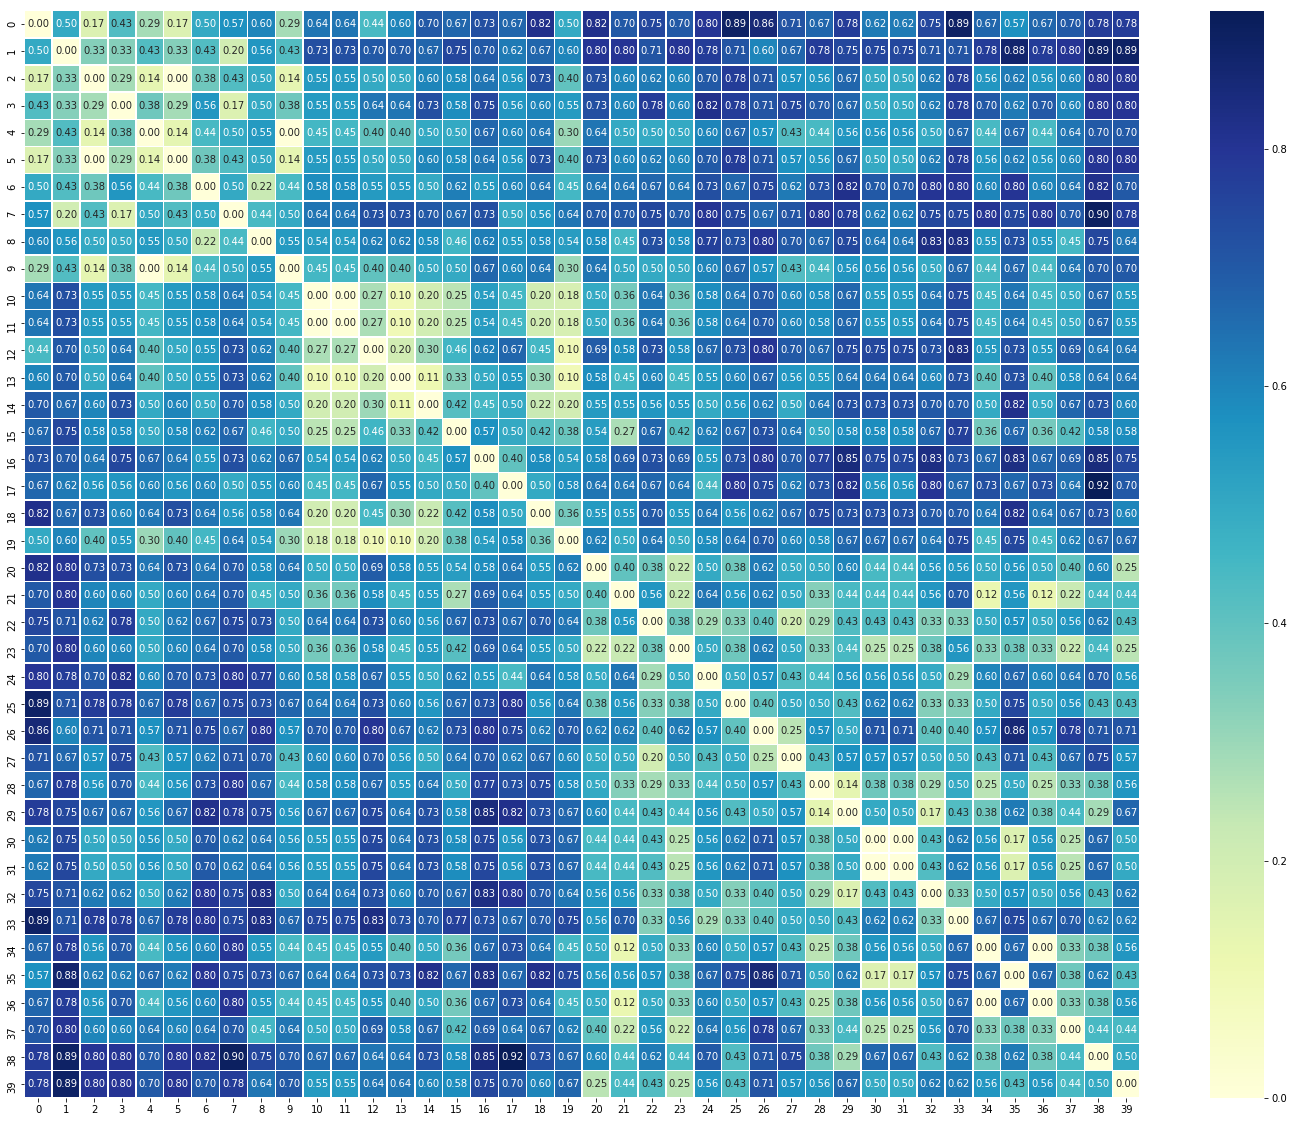

In [31]:
f,ax = plt.subplots(figsize=(25, 20))
sns.heatmap(Jdistance_matrix, annot=True, linewidths=.5, fmt= '.2f', cmap="YlGnBu")

plt.show()

## Clustering

### K-Medoids

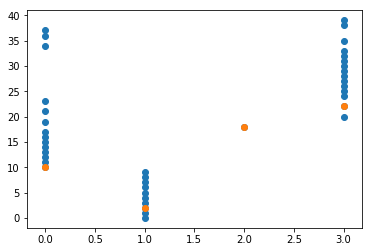

In [32]:
from pyclustering.cluster import kmedoids
import random

def kMedoids(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape

    if k > n:
        raise Exception('too many medoids')

    # find a set of valid initial cluster medoid indices since we
    # can't seed different clusters with two points at the same location
    valid_medoid_inds = set(range(n))
    invalid_medoid_inds = set([])
    rs,cs = np.where(D==0)
    # the rows, cols must be shuffled because we will keep the first duplicate below
    index_shuf = list(range(len(rs)))
    np.random.shuffle(index_shuf)
    rs = rs[index_shuf]
    cs = cs[index_shuf]
    for r,c in zip(rs,cs):
        # if there are two points with a distance of 0...
        # keep the first one for cluster init
        if r < c and r not in invalid_medoid_inds:
            invalid_medoid_inds.add(c)
    valid_medoid_inds = list(valid_medoid_inds - invalid_medoid_inds)

    if k > len(valid_medoid_inds):
        raise Exception('too many medoids (after removing {} duplicate points)'.format(
            len(invalid_medoid_inds)))

    # randomly initialize an array of k medoid indices
    M = np.array(valid_medoid_inds)
    np.random.shuffle(M)
    M = np.sort(M[:k])

    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in range(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

    # return results
    return M, C

##############################################################################################################################

matrix = Jdistance_matrix
M, C = kMedoids(matrix, 4)


##############################################################################################################################

a=np.empty(shape=len(line))
for i in range(len(C)):
    for j in (C[i]):
        a[j]=i
    

m=[0,1,2,3]

#plt.figure(figsize=(15,10))
plt.scatter(a, arr)
plt.scatter(m,M)

### K-Means

[2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 3 0 3 0 3 3 3 3 0 3 0 0 3 3 0 0 0
 0 3 3]


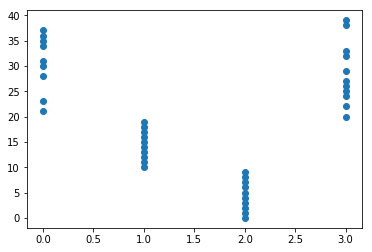

In [33]:
mat = Jdistance_matrix

kmeans = KMeans(n_clusters=4, init='k-means++').fit_predict(mat)
print(kmeans)

#plt.figure(figsize=(15,10))
plt.scatter(kmeans, arr)

# Euclidean Distance 

In [34]:
Edistance_matrix=np.empty(shape=(len(line),len(line)))

for i in range(len(line)):
    sumx=0
    for j in range(len(line)):
        sumx = np.sum((word_weight_matrix[i]-word_weight_matrix[j])**2)
        sumx = math.sqrt(sumx)
        Edistance_matrix[i][j]=sumx
        
Edistance_matrix

array([[0.        , 5.31135349, 5.61753107, ..., 8.50540636, 7.37299503,
        7.2897795 ],
       [5.31135349, 0.        , 6.46670762, ..., 8.44672272, 7.30522026,
        7.22122376],
       [5.61753107, 6.46670762, 0.        , ..., 9.27090983, 8.24432455,
        8.16998879],
       ...,
       [8.50540636, 8.44672272, 9.27090983, ..., 0.        , 8.82617093,
        8.12276927],
       [7.37299503, 7.30522026, 8.24432455, ..., 8.82617093, 0.        ,
        8.20660681],
       [7.2897795 , 7.22122376, 8.16998879, ..., 8.12276927, 8.20660681,
        0.        ]])

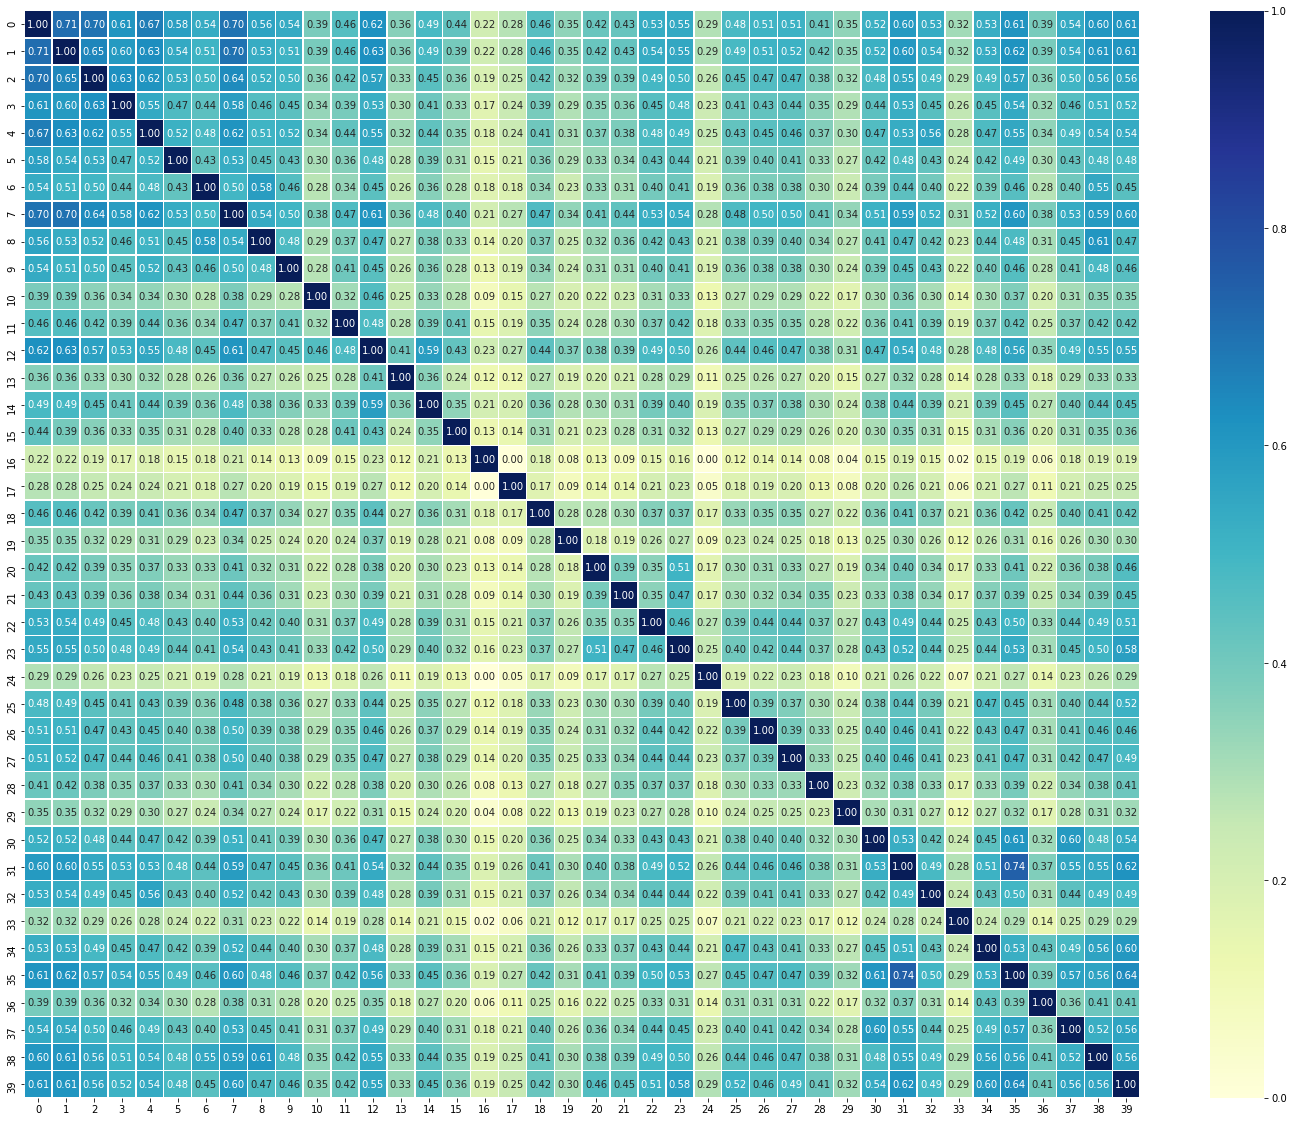

In [35]:
E1distance_matrix=(np.max(Edistance_matrix)-Edistance_matrix)/np.max(Edistance_matrix)
f,ax = plt.subplots(figsize=(25, 20))
sns.heatmap(E1distance_matrix, annot=True, linewidths=.5, fmt= '.2f', cmap="YlGnBu")

plt.show()

[3 3 3 3 3 2 2 3 2 2 0 0 3 0 2 0 1 1 0 0 0 0 2 2 1 2 2 2 0 0 2 3 2 1 2 3 0
 2 3 3]


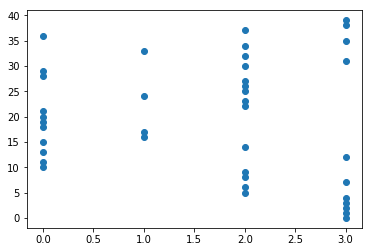

In [37]:
mat = E1distance_matrix

kmeans = KMeans(n_clusters=4, init='k-means++').fit_predict(mat)
print(kmeans)

#plt.figure(figsize=(15,10))
plt.scatter(kmeans, arr)

In [ ]:
np.shape(word_weight_matrix)